# 1. 2-D Transforms

In [1]:
def transform_plot(P,trans,color,kind,size):

    Pt = np.matmul(trans, P)

    P = P/P[-1, :]
    P = np.insert(P,4,P[:,0],axis=1)
    x = P[0, :]
    y = P[1, :]

    Pt = Pt/Pt[-1, :]
    Pt = np.insert(Pt,4,Pt[:,0],axis=1)
    xt = Pt[0, :]
    yt = Pt[1, :] 

    fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
    ax.plot(x, y, color='#07ACFF', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_aspect('equal')
    ax.set_xlim(size[0][0], size[0][1])
    ax.set_ylim(size[1][0], size[1][1])
    ax.plot(xt, yt, color=color, alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2,label=kind)
    ax.set_aspect('equal')
    ax.legend(loc="lower right")

    #fig.savefig(kind+'.tif', format='tif')
    return

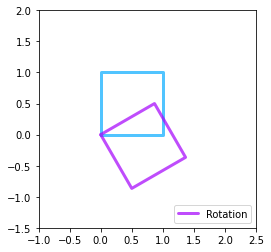

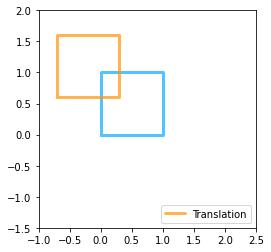

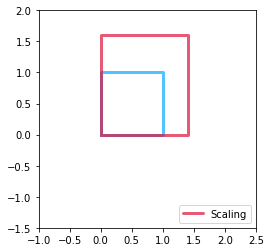

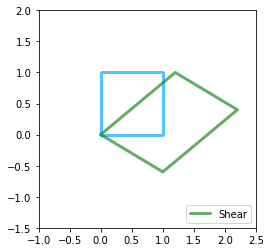

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import string
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
#print(P)
# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5

t1,t2 = -0.7,0.6
T = [[1, 0, t1], [0, 1, t2], [0, 0, 1]] #translation

t = np.pi/3
H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]] #rotation

s1,s2 = 1.4,1.6
S = [[s1, 0, 0], [0, s2, 0], [0, 0, 1]] #scalling

a1,a2 = 1.2,-0.6
SH = [[1, a1, 0], [a2, 1, 0], [0, 0, 1]] #shear

size = [[-1,2.5],[-1.5,2]]
transform_plot(P,H,'#A400FB','Rotation',size)
transform_plot(P,T,'#FF9505','Translation',size)
transform_plot(P,S,'#DC143C','Scaling',size)
transform_plot(P,SH,'#228B22','Shear',size)


### Euclidian, Similarity and Affine Transformations - Combined

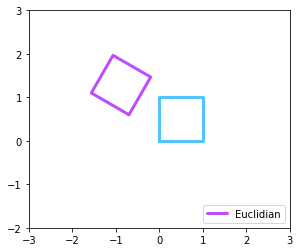

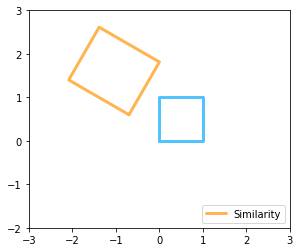

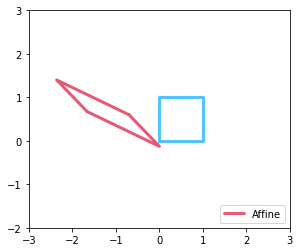

In [3]:

Euclidian = [[np.cos(t), -np.sin(t), t1], [np.sin(t), np.cos(t), t2], [0., 0., 1.]] #Euclidian
Similarity = [[s1*np.cos(t), -s2*np.sin(t), t1], [s1*np.sin(t), s2*np.cos(t), t2], [0., 0., 1.]] #Similarity
Affine = [[s1*np.cos(t), -s2*np.sin(t)*a1, t1], [s1*np.sin(t)*a2, s2*np.cos(t), t2], [0., 0., 1.]] #Affine

size = [[-3,3],[-2,3]]
transform_plot(P,Euclidian,'#A400FB','Euclidian',size)
transform_plot(P,Similarity,'#FF9505','Similarity',size)
transform_plot(P,Affine,'#DC143C','Affine',size)

# 2 2. Warping Using a Given Homography

In [1]:
import cv2 as cv
import numpy as np
im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('graf/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


# 3 3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping

In [58]:
import cv2 as cv
import numpy as np

N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('graf/img1.ppm',cv.IMREAD_ANYCOLOR)
im5 = cv.imread('graf/img5.ppm',cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im5copy = im5.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
cv.destroyAllWindows()

[[187. 140.]
 [391. 127.]
 [680. 115.]
 [772. 281.]
 [565. 545.]]
[[297. 151.]
 [398. 175.]
 [493. 196.]
 [527. 347.]
 [482. 582.]]


In [59]:
h, status = cv.findHomography(p2, p1)
print(h)
im5_warped = cv.warpPerspective(im5, h, (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.imshow("Image 4 Warped", im5_warped)
#cv.imwrite('img.tif',im5_warped)

[[ 1.04313669e+00 -7.64597084e-02 -1.70043435e+02]
 [-3.43578172e-01  5.68750502e-01  1.12725080e+02]
 [-1.05352353e-03  3.24291280e-05  1.00000000e+00]]


# 4 4. Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [60]:
def compute_homography(p2,p1):

    # create A
    A = np.zeros((2*N, 9))

    for i in range(0,2*N,2):
        j=i//2
        A[i] = np.append(np.append(np.array([-p2[j][0],-p2[j][1],-1]),np.zeros((1,3))),np.array([p2[j][0]*p1[j][0],p2[j][1]*p1[j][0],p1[j][0]]))
        A[i+1] =np.append(np.append(np.zeros((1,3)),np.array([-p2[j][0],-p2[j][1],-1])),np.array([p2[j][0]*p1[j][1],p2[j][1]*p1[j][1],p1[j][1]]))

    w,v = np.linalg.eig(np.matmul(A.T,A))
    id = w.argsort()[::-1]
    v = v[:,id]
    return v[:,-1].reshape((3,3))

In [61]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('graf/img5.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)


KeyboardInterrupt: 

In [51]:
h = compute_homography(p2,p1)
print(h)
im4_warped = cv.warpPerspective(im4, h, (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.imwrite('img5.tif',im4_warped)
cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[-6.29729097e-03  4.30493210e-03 -7.88204208e-01]
 [-1.35450005e-03 -4.30518803e-03  6.15332563e-01]
 [ 2.27196721e-06 -1.63881525e-06 -4.62657408e-03]]


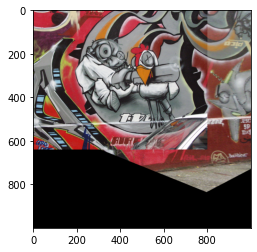

In [53]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(im4_warped, cv.COLOR_BGR2RGB))

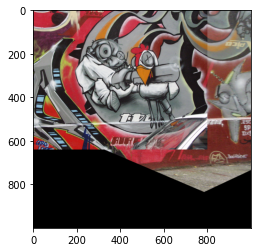

In [55]:
with open('graf/H1to4p') as f:
    H1 = [[float(x) for x in line.split()] for line in f]
H1=np.array(H1)

H2, status = cv.findHomography(p2, p1)
#print(H2)
im4_warped1 = cv.warpPerspective(im4, np.linalg.inv(H1), (1000,1000))
im4_warped1[0:im1.shape[0], 0:im1.shape[1]] = im1
plt.imshow(cv.cvtColor(im4_warped1, cv.COLOR_BGR2RGB))
cv.imwrite('img5_givenH.tif',im4_warped1)


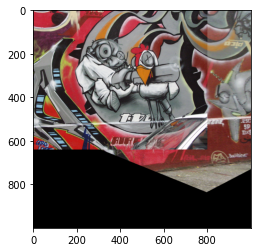

In [57]:
im4_warped2 = cv.warpPerspective(im4, H2, (1000,1000))
im4_warped2[0:im1.shape[0], 0:im1.shape[1]] = im1
plt.imshow(cv.cvtColor(im4_warped2, cv.COLOR_BGR2RGB))
cv.imwrite('img5_openCVH.tif',im4_warped2)